In [ ]:
import tensorflow as tf
import shutil
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

tf.__version__

In [ ]:
!wget --no-check-certificate \  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

In [ ]:
localzip = "/tmp/rockpaperscissors.zip"
zip_ref =  zipfile.ZipFile(localzip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# create train validation directory name
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissor_dir = os.path.join(base_dir, 'scissors')

In [ ]:
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissor_dir, val_scissor_dir = train_test_split(os.listdir(scissor_dir), test_size=0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(validation_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(validation_dir, 'paper')
train_scissor = os.path.join(train_dir, 'scissors')
val_scissor = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissor)

os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissor)

In [ ]:
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissor_dir:
  shutil.copy(os.path.join(scissor_dir, i), os.path.join(train_scissor,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissor_dir:
  shutil.copy(os.path.join(scissor_dir, i), os.path.join(val_scissor, i))

In [101]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_dategen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [107]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_dategen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [108]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 17, 17, 128)      

In [112]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [113]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 66s - loss: 1.1781 - accuracy: 0.3837 - val_loss: 0.9883 - val_accuracy: 0.6500 - 66s/epoch - 3s/step
Epoch 2/20
25/25 - 64s - loss: 0.8556 - accuracy: 0.6425 - val_loss: 0.7054 - val_accuracy: 0.7437 - 64s/epoch - 3s/step
Epoch 3/20
25/25 - 63s - loss: 0.5653 - accuracy: 0.7925 - val_loss: 0.3705 - val_accuracy: 0.8375 - 63s/epoch - 3s/step
Epoch 4/20
25/25 - 70s - loss: 0.4028 - accuracy: 0.8450 - val_loss: 0.4041 - val_accuracy: 0.8250 - 70s/epoch - 3s/step
Epoch 5/20
25/25 - 61s - loss: 0.2854 - accuracy: 0.9062 - val_loss: 0.1293 - val_accuracy: 0.9688 - 61s/epoch - 2s/step
Epoch 6/20
25/25 - 62s - loss: 0.1743 - accuracy: 0.9388 - val_loss: 0.2701 - val_accuracy: 0.9187 - 62s/epoch - 2s/step
Epoch 7/20
25/25 - 65s - loss: 0.2260 - accuracy: 0.9300 - val_loss: 0.1383 - val_accuracy: 0.9438 - 65s/epoch - 3s/step
Epoch 8/20
25/25 - 61s - loss: 0.1531 - accuracy: 0.9488 - val_loss: 0.1255 - val_accuracy: 0.9875 - 61s/epoch - 2s/step
Epoch 9/20
25/25 - 65s - loss: 0

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
1/1 [==============================] - 0s 46ms/step
00nKV8oHuTGi20gq.png
Rock


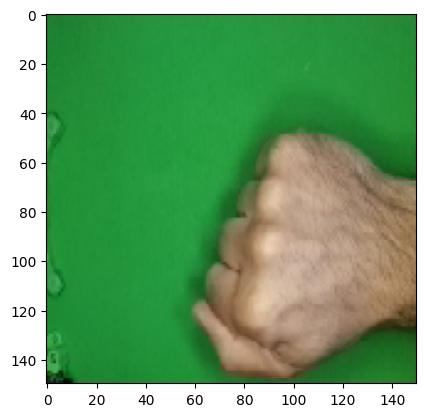

In [116]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(fn)
if classes[0][0]!=0:
  print('Paper')
elif classes[0][1]!=0:
  print('Rock')
else:
  print('Scissors')

**Sumbmision Proyek Akhir Belajar Machine Learning untuk Pemula**

Nama : Revandho Vianuara Dirgantoro
Email : rvd210594@gmail.com
Domisili : Yogyakarta
Beasiswa : IDCamp